# Project Challenge-Part I

In [323]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data=pd.read_csv("cars_data.csv")

In [5]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
#Check information about the data. How many numerical and categorical variables exist in the dataset?

data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [328]:
data.shape

(11914, 16)

In [329]:
#Check the statistical description of the data. 
# Check the statistical description of the data
#What are the maximum and minimum prices of the cars? 
#What is the standard deviation of the city fuel consumption of the cars

data.describe()



,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
#Check how many cars from each brand are in the dataset.
data['Make'].value_counts()

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

In [8]:
#Check the column name of the dataset. 
#Is there any inconsistency in the column names? 
#Is there a way to resolve the inconsistency in this case?

column_names = data.columns
column_names

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
#Is there any inconsistency in the column names? 
#Is there a way to resolve the inconsistency in this case?

# Convert column names to lowercase
data.columns = data.columns.str.lower()
data.columns

In [ ]:
# Check the duplicate rows. What should we do about the duplicate data?
data.duplicated()


In [ ]:
data.duplicated().sum()

In [ ]:
#Drop the duplicated rows

data.drop_duplicates(inplace=True)
data

In [ ]:
#Check data for null values. Remove the rows with missing values from the dataframe.
data.isnull().sum()

In [ ]:
data.isna().sum()

In [ ]:
data.dropna(how='any', axis=0, inplace=True)

In [ ]:
data.info()


In [ ]:
# Save the data for future use.

data.to_csv('cleaned_cars_data.csv', index=False)


In [ ]:
df=pd.read_csv('cleaned_cars_data.csv')


In [ ]:
df.info()

# Project Challenge Part II

In [332]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data=pd.read_csv('cleaned_cars_data.csv')

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7735 non-null   object 
 1   model              7735 non-null   object 
 2   year               7735 non-null   int64  
 3   engine fuel type   7735 non-null   object 
 4   engine hp          7735 non-null   float64
 5   engine cylinders   7735 non-null   float64
 6   transmission type  7735 non-null   object 
 7   driven_wheels      7735 non-null   object 
 8   number of doors    7735 non-null   float64
 9   market category    7735 non-null   object 
 10  vehicle size       7735 non-null   object 
 11  vehicle style      7735 non-null   object 
 12  highway mpg        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  popularity         7735 non-null   int64  
 15  msrp               7735 non-null   int64  
dtypes: float64(3), int64(5),

In [335]:
data.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [10]:
#Separate the features (X) and label (y).

X=data[['make', 'model', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg','popularity']]


In [11]:
y=data['msrp']
y

0       46135
1       40650
2       36350
3       29450
4       34500
        ...  
7730    46120
7731    56670
7732    50620
7733    50920
7734    28995
Name: msrp, Length: 7735, dtype: int64

In [12]:
#Split the dataframe into training and test data
X_train,X_test,y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=99)

In [13]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((6188, 13), (1547, 13), (6188,), (1547,))

In [341]:
X_train.dtypes

make                  object
model                 object
engine fuel type      object
engine hp            float64
engine cylinders     float64
transmission type     object
driven_wheels         object
number of doors      float64
vehicle size          object
vehicle style         object
highway mpg            int64
city mpg               int64
popularity             int64
dtype: object

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6188, 13), (1547, 13), (6188,), (1547,))

In [15]:
#Recombine the train features (X_train) and label (y_train) in one dataframe. 
#As we analyze training data, we need to combine them into one dataframe


df_train= pd.merge(X_train, y_train, left_index=True, right_index=True)


In [16]:
# Another Way to recombine!

# Recombine the train features (X_train) and label (y_train) in one dataframe. As we analyze training data, we need to combine them into one dataframe

pd.concat([X_train,y_train], axis=1)   

,make,model,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
3562,Volkswagen,Golf GTI,premium unleaded (recommended),220.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,33,25,873,28190
3294,Infiniti,G Sedan,premium unleaded (recommended),328.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,27,19,190,39950
2380,Cadillac,DTS,premium unleaded (recommended),292.0,8.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,23,15,1624,59875
421,BMW,5 Series Gran Turismo,premium unleaded (required),445.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,4dr Hatchback,25,16,3916,69100
6756,Volkswagen,Tiguan,premium unleaded (recommended),200.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,24,20,873,32605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Honda,Civic,regular unleaded,174.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,40,31,2202,20500
3240,Infiniti,FX35,premium unleaded (required),275.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,20,15,190,39550
5305,Infiniti,QX70,premium unleaded (required),325.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,22,16,190,47650
7203,Volvo,V70,premium unleaded (recommended),235.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Wagon,24,16,870,32465


In [17]:
df_train=pd.concat([X_train,y_train], axis=1) 


In [18]:
df_train['msrp'].max()

2065902

In [19]:
df_train['msrp'].min()

2000

In [20]:
#How does the car price distribution look?
df_train.describe()


,engine hp,engine cylinders,number of doors,highway mpg,city mpg,popularity,msrp
count,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6.188000e+03
mean,278.132515,5.826277,3.420006,26.487233,19.449903,1506.739011,5.159600e+04
std,116.207462,1.905062,0.895673,6.904858,7.319637,1425.701558,7.496982e+04
min,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,194.000000,4.000000,2.000000,22.000000,16.000000,520.000000,2.623875e+04
50%,270.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.550000e+04
75%,325.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.956125e+04
max,1001.000000,16.000000,4.000000,111.000000,137.000000,5657.000000,2.065902e+06


# Plot the data

In [ ]:
#Original DataFrame: 
Use the original dataframe to analyze:
the overall car price distribution
the effect of engine horsepower on car price,
the top 5 most expensive car brands,
and the count of cars with different numbers of doors according to less than and more than 4 cylinders.

#Train Data Subset: Use the train data subset to analyze:
the top 5 most popular car brands, 
the price distribution for the top 5 most popular car brands
and how the average price changes per year.

In [21]:
# how does the car price distribution look?
frequency=data['msrp'].value_counts()
frequency

msrp
2000     307
29995     16
25995     14
24995     11
43950     10
        ... 
18960      1
23170      1
17170      1
18515      1
50920      1
Name: count, Length: 4644, dtype: int64

In [22]:
frequency.info()

<class 'pandas.core.series.Series'>
Index: 4644 entries, 2000 to 50920
Series name: count
Non-Null Count  Dtype
--------------  -----
4644 non-null   int64
dtypes: int64(1)
memory usage: 72.6 KB


In [23]:
# Assign the Series as a new column in the DataFrame
data['frequency']=frequency

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6188 entries, 3562 to 4737
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               6188 non-null   object 
 1   model              6188 non-null   object 
 2   engine fuel type   6188 non-null   object 
 3   engine hp          6188 non-null   float64
 4   engine cylinders   6188 non-null   float64
 5   transmission type  6188 non-null   object 
 6   driven_wheels      6188 non-null   object 
 7   number of doors    6188 non-null   float64
 8   vehicle size       6188 non-null   object 
 9   vehicle style      6188 non-null   object 
 10  highway mpg        6188 non-null   int64  
 11  city mpg           6188 non-null   int64  
 12  popularity         6188 non-null   int64  
 13  msrp               6188 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 854.2+ KB


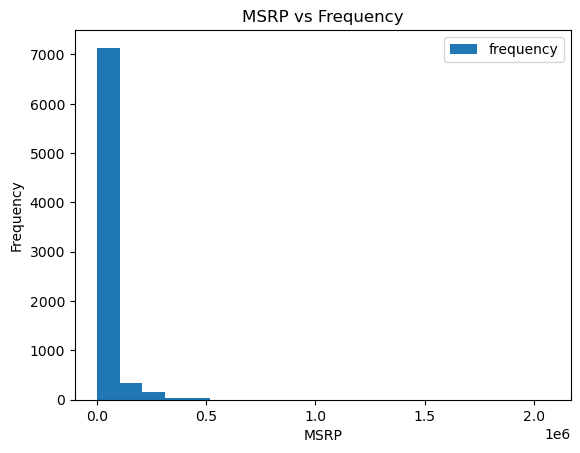

In [353]:
# Step 2: create histograms for count and msrp in one plot

plt.hist(x =data['msrp'], label ='frequency', bins = 20, rwidth=1)
plt.legend()
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title("MSRP vs Frequency");

#rwidth: Set Width for Bars in Bar Plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

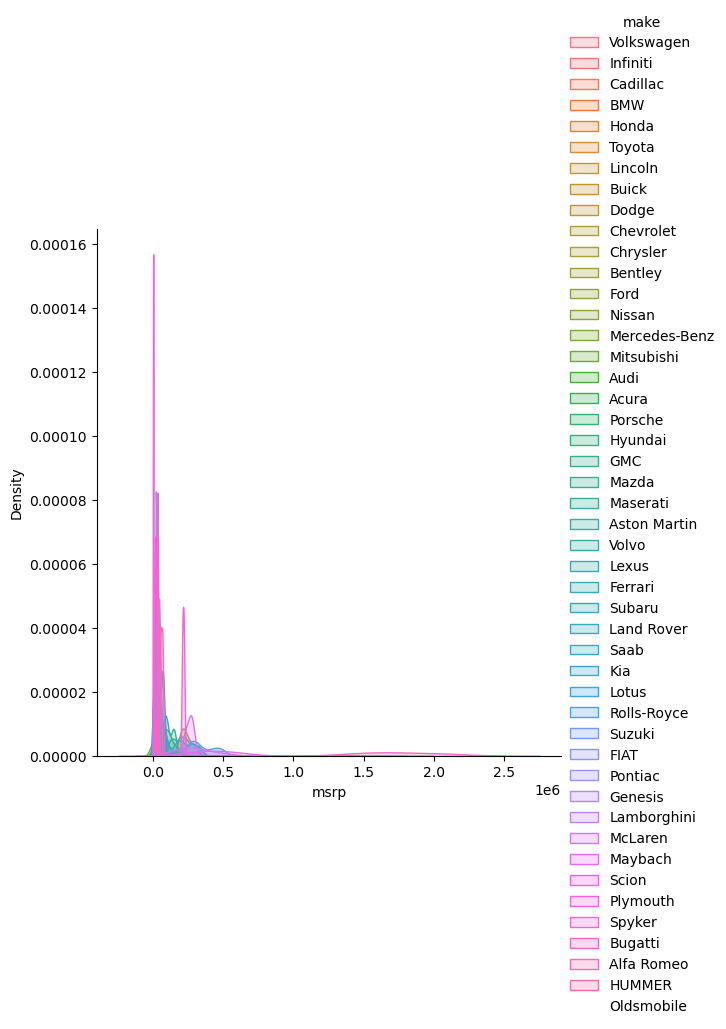

In [27]:

import seaborn as sns
sns.FacetGrid(df_train, hue="make", height=6) \
   .map(sns.kdeplot, "msrp", shade=True) \
   .add_legend()


In [386]:
#What is the effect of engine horsepower on car price?
data[['engine hp','msrp']].corr()

,engine hp,msrp
engine hp,1.000000,0.655522
msrp,0.655522,1.000000


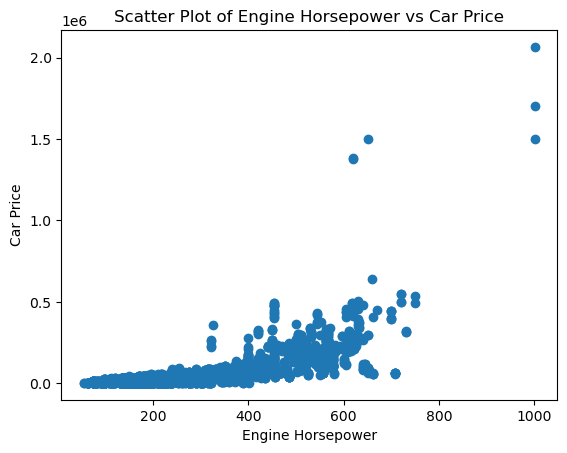

In [387]:
# Plot the data
plt.scatter(data['engine hp'], data['msrp'])
plt.xlabel('Engine Horsepower')
plt.ylabel('Car Price')
plt.title('Scatter Plot of Engine Horsepower vs Car Price')
plt.show()


In [390]:
# What are the top 5 most popular car brands?
data_pop=data['make'].value_counts()


In [391]:
data_5_pop=data_pop.sort_values(ascending=False).head(5)

In [392]:
data_5_pop

make
Chevrolet        608
Ford             485
Volkswagen       411
Cadillac         396
Mercedes-Benz    340
Name: count, dtype: int64

In [393]:
#How does the price distribution look for the top 5 most popular car brands?

data_pop_distribution=data_5_pop.describe()
data_pop_distribution


count      5.00000
mean     448.00000
std      103.32715
min      340.00000
25%      396.00000
50%      411.00000
75%      485.00000
max      608.00000
Name: count, dtype: float64

In [394]:
# What is the count of cars with different numbers of doors according to less than and more than 4 cylinders?

data_less_4_count=data[data['number of doors']<4].value_counts

In [395]:
data_more_4_count=data[data['number of doors']>4].value_counts

In [389]:
#How does the average price change per year?
#groupby year
data_avg_price_per_year=data.groupby('year')['msrp'].mean()
data_avg_price_per_year

year
1990     2073.088235
1991     2222.909091
1992     2192.492958
1993     2401.287500
1994     2726.070175
1995     3269.568627
1996     3140.020833
1997     4523.543860
1998     4433.774194
1999     3611.555556
2000     3913.186441
2001    73832.530303
2002    55703.915493
2003    68312.340909
2004    55907.648352
2005    53724.282609
2006    39000.882353
2007    41172.806306
2008    80462.086486
2009    59193.114391
2010    60151.760369
2011    65663.336245
2012    71837.336918
2013    55201.335740
2014    71196.306080
2015    52612.756355
2016    52579.647783
2017    45333.111826
Name: msrp, dtype: float64

# Part III

In [354]:
data=pd.read_csv("cleaned_cars_data.csv")

In [ ]:
data

In [9]:
data.describe()

,year,engine hp,engine cylinders,number of doors,highway mpg,city mpg,popularity,msrp
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7735 non-null   object 
 1   model              7735 non-null   object 
 2   year               7735 non-null   int64  
 3   engine fuel type   7735 non-null   object 
 4   engine hp          7735 non-null   float64
 5   engine cylinders   7735 non-null   float64
 6   transmission type  7735 non-null   object 
 7   driven_wheels      7735 non-null   object 
 8   number of doors    7735 non-null   float64
 9   market category    7735 non-null   object 
 10  vehicle size       7735 non-null   object 
 11  vehicle style      7735 non-null   object 
 12  highway mpg        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  popularity         7735 non-null   int64  
 15  msrp               7735 non-null   int64  
dtypes: float64(3), int64(5),

In [355]:
#Subset the train dataframe to extract the numerical columns. (In this case, do not consider the popularity column.)

numerical_columns = data.select_dtypes(include=['int', 'float']).drop(columns=['popularity'])

numerical_columns


,year,engine hp,engine cylinders,number of doors,highway mpg,city mpg,msrp
0,2011,335.0,6.0,2.0,26,19,46135
1,2011,300.0,6.0,2.0,28,19,40650
2,2011,300.0,6.0,2.0,28,20,36350
3,2011,230.0,6.0,2.0,28,18,29450
4,2011,230.0,6.0,2.0,28,18,34500
...,...,...,...,...,...,...,...
7730,2012,300.0,6.0,4.0,23,16,46120
7731,2012,300.0,6.0,4.0,23,16,56670
7732,2012,300.0,6.0,4.0,23,16,50620
7733,2013,300.0,6.0,4.0,23,16,50920


In [ ]:
numerical_columns.info()

### Another way to calculate the correlations

In [356]:
# Another way to calculate the correlations.

# Extract correlations between 'price' and other numerical columns
price_corr=numerical_columns.corr()['msrp']
price_corr

year                0.125162
engine hp           0.655522
engine cylinders    0.589557
number of doors    -0.193079
highway mpg        -0.255595
city mpg           -0.266632
msrp                1.000000
Name: msrp, dtype: float64

In [357]:
price_corr.info()

<class 'pandas.core.series.Series'>
Index: 7 entries, year to msrp
Series name: msrp
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 412.0+ bytes


### Use the numerical columns to be as features

In [358]:
#Generate a heatmap of the subset dataframe. Which feature has the highest correlation with the price column?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

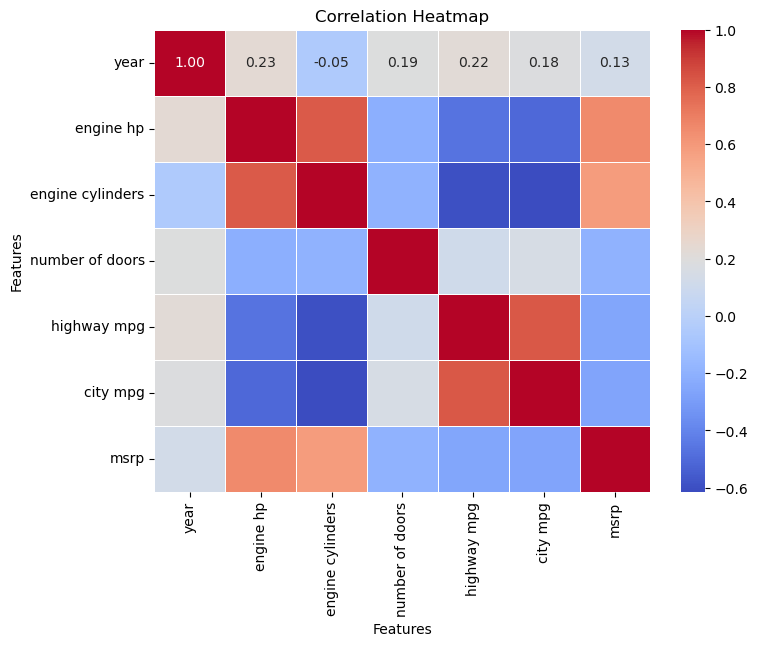

In [470]:

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


## Model 2
### Use "engine cylinders " as feature and price as target to build the model

In [360]:
#Choose the feature that wants to use as dependent.

feature="engine cylinders"
# Extract the feature and target variable

X=numerical_columns[['engine cylinders']]
y=numerical_columns['msrp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
r2

0.3872911938402753

## Use "Engine hp" as feature to predict

In [361]:
#Using that feature from step. 2, build a simple linear regression model with price as the target variable. Calculate R2.

# Use "engine hp" as feature to build the model.
feature="engine hp"
# Extract the feature and target variable

X=numerical_columns[['engine hp']]
y=numerical_columns['msrp']


In [362]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [363]:
# Instantiate the linear regression model
model = LinearRegression()

In [364]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [365]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([23937.53201934,  2962.22200186, 54190.38300608, ...,
       20307.18990093, 62257.80993587, 52173.52627363])

In [366]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
r2

0.438761943519719

## Use "Engine hp" as feature to predict

In [25]:
#Choose the feature that wants to use as dependent.

feature="engine hp"
# Extract the feature and target variable

X=numerical_columns[['engine hp']]
y=numerical_columns['msrp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
r2

0.5713962369327159

In [369]:
y_pred #Predicted values from the dataset

array([23937.53201934,  2962.22200186, 54190.38300608, ...,
       20307.18990093, 62257.80993587, 52173.52627363])

In [371]:
y_test #True values from the dataset

1361    34875
4736    30550
6253    39965
1377    20195
5841    43400
        ...  
5143    46200
6882    47225
7261    22600
1583    33460
7041    35550
Name: msrp, Length: 1934, dtype: int64

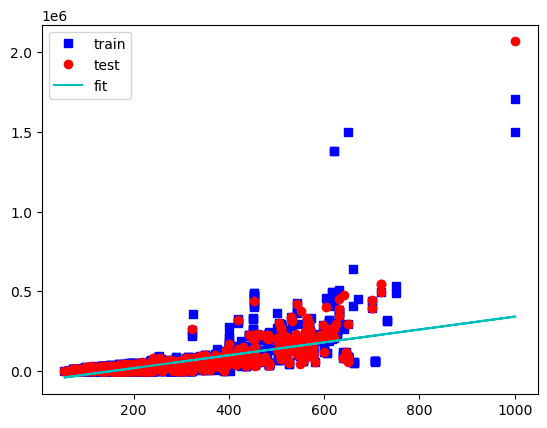

In [372]:
plt.plot(X_train["engine hp"], y_train, 'bs', label="train")
plt.plot(X_test["engine hp"], y_test, 'ro', label="test")
plt.plot(X_test["engine hp"], y_pred, 'c', label="fit")
plt.legend()

# Part IV- Price Distribution

In [373]:
data.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7735 non-null   object 
 1   model              7735 non-null   object 
 2   year               7735 non-null   int64  
 3   engine fuel type   7735 non-null   object 
 4   engine hp          7735 non-null   float64
 5   engine cylinders   7735 non-null   float64
 6   transmission type  7735 non-null   object 
 7   driven_wheels      7735 non-null   object 
 8   number of doors    7735 non-null   float64
 9   market category    7735 non-null   object 
 10  vehicle size       7735 non-null   object 
 11  vehicle style      7735 non-null   object 
 12  highway mpg        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  popularity         7735 non-null   int64  
 15  msrp               7735 non-null   int64  
dtypes: float64(3), int64(5),

In [93]:
#All Car price range

all_car_price_range=data['msrp'].min(),data['msrp'].max()
all_car_price_range

(2000, 2065902)

In [96]:
# Size based price range

size_price_range = data.groupby('vehicle size')['msrp'].agg(['min', 'max'])
size_price_range

,min,max
vehicle size,,
Compact,2000,2065902
Large,2000,1382750
Midsize,2000,548800


In [107]:
#Popularity by door configuration

door_popularity=data.groupby('number of doors').count()
door_popularity

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
number of doors,,,,,,,,,,,,,,,
2.0,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155
3.0,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
4.0,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414


In [102]:
#Fuel efficiency by fuel type

fuel_efficiency=data.groupby('engine fuel type')['highway mpg'].mean()
fuel_efficiency

engine fuel type
diesel                                           36.523490
electric                                        103.000000
flex-fuel (premium unleaded recommended/E85)     25.346154
flex-fuel (premium unleaded required/E85)        19.943396
flex-fuel (unleaded/E85)                         22.581050
premium unleaded (recommended)                   28.364042
premium unleaded (required)                      23.870833
regular unleaded                                 27.720764
Name: highway mpg, dtype: float64

In [104]:
# Engine horsepower by car size

engine_hp=data.groupby('vehicle size')['engine hp'].mean()
engine_hp

vehicle size
Compact    231.817000
Large      343.370190
Midsize    280.638515
Name: engine hp, dtype: float64

## Regression error metrics

### Take the last model that you trained as part of the linear regression challenge. Calculate the regression error metrics as follows

In [66]:
#Subset the train dataframe to extract the numerical columns. (In this case, do not consider the popularity column.)

numerical_columns

,year,engine hp,engine cylinders,number of doors,highway mpg,city mpg,msrp
0,2011,335.0,6.0,2.0,26,19,46135
1,2011,300.0,6.0,2.0,28,19,40650
2,2011,300.0,6.0,2.0,28,20,36350
3,2011,230.0,6.0,2.0,28,18,29450
4,2011,230.0,6.0,2.0,28,18,34500
...,...,...,...,...,...,...,...
7730,2012,300.0,6.0,4.0,23,16,46120
7731,2012,300.0,6.0,4.0,23,16,56670
7732,2012,300.0,6.0,4.0,23,16,50620
7733,2013,300.0,6.0,4.0,23,16,50920



## Calculate the regression error metrics by using "Engine Cylinders" as Feature

In [401]:
#Choose the feature that wants to use as dependent.

feature="engine hp"
# Extract the feature and target variable

X=numerical_columns[['engine hp']]
y=numerical_columns['msrp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
r2

0.5536257589935264

In [402]:
predicted = model.predict(X_test)
predicted

array([ 44020.80761838,  35690.23375397, 110665.39853369, ...,
        47353.03716415,  23194.37295735,  31524.94682176])

In [403]:
# Create a DataFrame 

actual_vs_predicted = pd.DataFrame(
    {'actual': y_test, 
     'predicted':y_pred}
)

In [377]:
actual_vs_predicted

,actual,predicted
6801,39580,54863.662045
5311,63250,100813.617886
1733,19700,8913.706205
1948,70195,100813.617886
7486,43350,8913.706205
...,...,...
5903,36000,54863.662045
1814,32895,54863.662045
1353,33995,8913.706205
5031,33580,54863.662045


In [404]:
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error # MSE


In [405]:
predicted = model.predict(X_test)

In [406]:
#Calculate the regression error such as MAE, MSE, and RMSE

MAE = mean_absolute_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

24542.31

In [407]:
MSE = mean_squared_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

1403432842.31

In [408]:
# Square root of MSE gives RMSE
RMSE = MSE**(1/2)
RMSE.round(2)

37462.42

<Axes: >

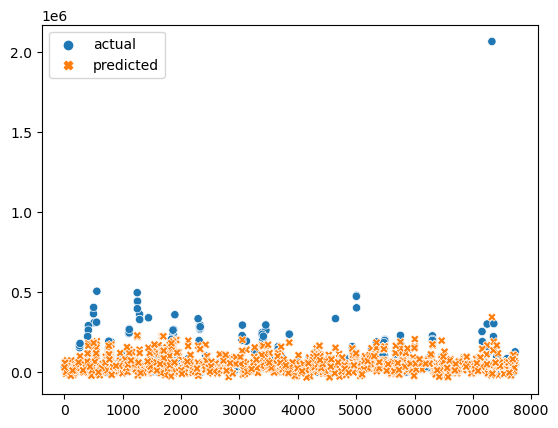

In [1532]:


sns.scatterplot(data=actual_vs_predicted)

### Another try : Use Engine hp as feature to predict

In [416]:
data=pd.read_csv("cleaned_cars_data.csv")

In [418]:
data.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [419]:
#Subset the train dataframe to extract the numerical columns. (In this case, do not consider the popularity column.)

numerical_columns = data.select_dtypes(include=['int', 'float']).drop(columns=['popularity'])

numerical_columns

,year,engine hp,engine cylinders,number of doors,highway mpg,city mpg,msrp
0,2011,335.0,6.0,2.0,26,19,46135
1,2011,300.0,6.0,2.0,28,19,40650
2,2011,300.0,6.0,2.0,28,20,36350
3,2011,230.0,6.0,2.0,28,18,29450
4,2011,230.0,6.0,2.0,28,18,34500
...,...,...,...,...,...,...,...
7730,2012,300.0,6.0,4.0,23,16,46120
7731,2012,300.0,6.0,4.0,23,16,56670
7732,2012,300.0,6.0,4.0,23,16,50620
7733,2013,300.0,6.0,4.0,23,16,50920


In [420]:
#Choose the feature that wants to use as dependent.

feature="engine hp"
# Extract the feature and target variable

X=numerical_columns[['engine hp']]
y=numerical_columns['msrp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
r2

0.41300588889956313

In [421]:

predicted = model.predict(X_test)

In [422]:
predicted

array([ 35822.62193353,  13507.25232897,   7421.24243682, ...,
        52051.98164594, 181886.8593452 ,  82482.0311067 ])

In [423]:
# Create a DataFrame for fun

actual_vs_predicted = pd.DataFrame(
    {'actual': y_test, 
     'predicted':y_pred}
)

In [49]:
actual_vs_predicted

,actual,predicted
792,130400,133147.756572
6843,62200,35557.359679
1456,29695,21022.619716
2846,32360,23099.011139
5803,48400,74178.240151
...,...,...
1533,198190,136469.982849
1719,2033,2335.096906
2477,29455,29328.185409
1387,20695,6487.879753


In [424]:
#Calculate the regression error such as MAE, MSE, and RMSE

MAE = mean_absolute_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

24986.38

In [425]:
MSE = mean_squared_error(
    y_true=y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

2986478310.58

In [426]:
# Square root of MSE gives RMSE
RMSE = MSE**(1/2)
RMSE.round(2)

54648.68

# Part V- Impute Missing Values

In [1186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error # MSE.csv")

In [1187]:
df=pd.read_csv("cleaned_cars_data.csv")

In [1188]:
df.shape

(7735, 16)

In [1189]:
df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [1190]:
df.isnull().sum()

make                 0
model                0
year                 0
engine fuel type     0
engine hp            0
engine cylinders     0
transmission type    0
driven_wheels        0
number of doors      0
market category      0
vehicle size         0
vehicle style        0
highway mpg          0
city mpg             0
popularity           0
msrp                 0
dtype: int64

In [1191]:
df.isna().sum()

make                 0
model                0
year                 0
engine fuel type     0
engine hp            0
engine cylinders     0
transmission type    0
driven_wheels        0
number of doors      0
market category      0
vehicle size         0
vehicle style        0
highway mpg          0
city mpg             0
popularity           0
msrp                 0
dtype: int64

In [1192]:
df.duplicated().sum()


0

In [1193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7735 non-null   object 
 1   model              7735 non-null   object 
 2   year               7735 non-null   int64  
 3   engine fuel type   7735 non-null   object 
 4   engine hp          7735 non-null   float64
 5   engine cylinders   7735 non-null   float64
 6   transmission type  7735 non-null   object 
 7   driven_wheels      7735 non-null   object 
 8   number of doors    7735 non-null   float64
 9   market category    7735 non-null   object 
 10  vehicle size       7735 non-null   object 
 11  vehicle style      7735 non-null   object 
 12  highway mpg        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  popularity         7735 non-null   int64  
 15  msrp               7735 non-null   int64  
dtypes: float64(3), int64(5),

In [1194]:
df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
# Define X and y


In [1195]:
X = df.drop('msrp', axis=1)


In [1196]:
y=df['msrp']

In [ ]:
# Split the dataframe into training and test data

In [1197]:
from sklearn.model_selection import train_test_split

In [1198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1199]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((6188, 15), (1547, 15), (6188,), (1547,))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

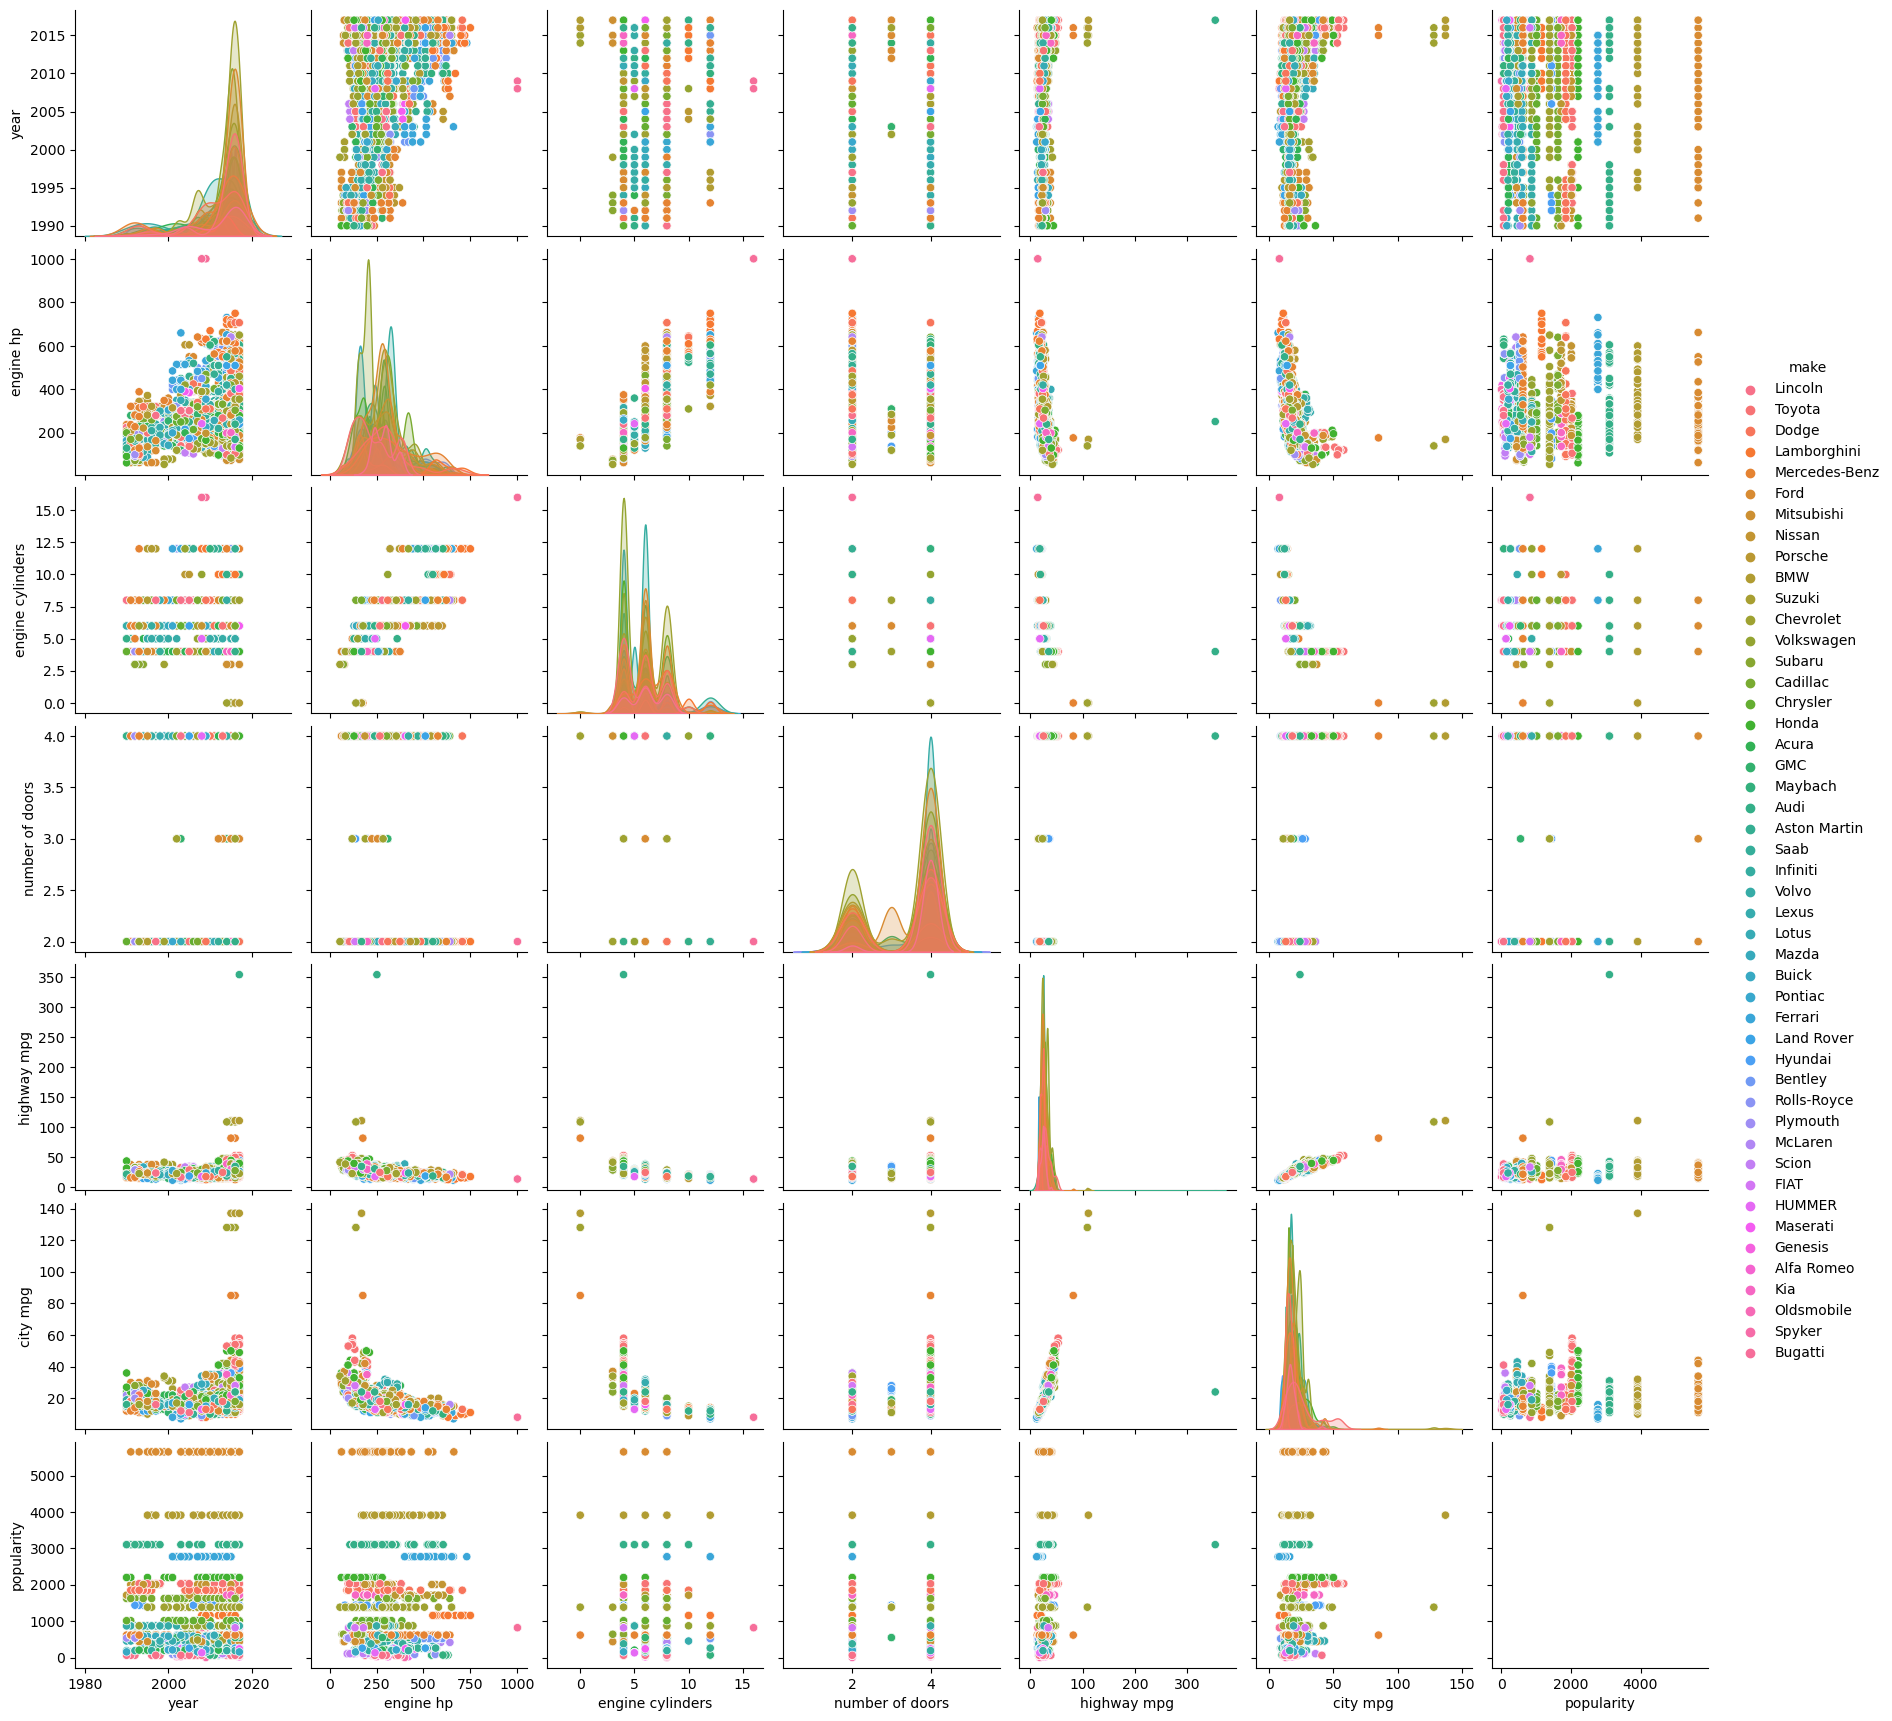

In [786]:
# How can we plot all the variables in X_train pairwise?
sns.pairplot(X_train, hue='make')

In [ ]:
# Use the appropriate strategy that you have learned during the encounter 
#to impute missing values for both the train and test datasets separately

In [1200]:
from sklearn.impute import SimpleImputer


# Will imputer missing values for X_train first.
cols = X_train.drop('market category', axis=1)
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(cols)
t_train = imputer.transform(cols) # <- output is a numpy array


In [1201]:
t_train.shape

(6188, 14)

In [1204]:
X_train_fe=pd.DataFrame(t_train, columns=imputer.get_feature_names_out())

In [1205]:
X_train_fe.shape

(6188, 14)

In [1217]:
X_train_fe

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,vehicle size,vehicle style,highway mpg,city mpg,popularity
0,Lincoln,MKC,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,28,21,61
1,Toyota,Avalon Hybrid,2016,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,39,40,2031
2,Dodge,Grand Caravan,2015,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,25,17,1851
3,Lamborghini,Gallardo,2014,premium unleaded (required),570.0,10.0,MANUAL,all wheel drive,2.0,Compact,Coupe,20,13,1158
4,Mercedes-Benz,C43 AMG,1999,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,Compact,Sedan,21,16,617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,Infiniti,Q70,2014,premium unleaded (required),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,24,16,190
6184,Dodge,Ram Pickup 1500,2009,flex-fuel (unleaded/E85),310.0,8.0,AUTOMATIC,four wheel drive,2.0,Large,Regular Cab Pickup,18,13,1851
6185,Audi,A3,2016,premium unleaded (recommended),170.0,4.0,AUTOMATED_MANUAL,front wheel drive,2.0,Compact,Convertible,35,24,3105
6186,Cadillac,XTS,2016,regular unleaded,304.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,28,18,1624


In [1206]:
X_test.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity'],
      dtype='object')

In [1207]:
# same step for X_test

# Will imputer missing values for X_train first.
cols = X_test.drop('market category', axis=1)
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(cols)
t_test = imputer.transform(cols) # <- output is a numpy array

In [1208]:
t_test.shape

(1547, 14)

In [1209]:
X_test_fe=pd.DataFrame(t_test, columns=imputer.get_feature_names_out())

In [1220]:
X_test_fe.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,vehicle size,vehicle style,highway mpg,city mpg,popularity
0,Honda,Civic del Sol,1996,regular unleaded,160.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,27,23,2202
1,Audi,90,1995,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Compact,Sedan,23,17,3105
2,Subaru,Impreza WRX,2014,premium unleaded (required),265.0,4.0,MANUAL,all wheel drive,4.0,Compact,Sedan,25,19,640
3,Maserati,GranSport,2006,premium unleaded (required),401.0,8.0,AUTOMATIC,rear wheel drive,2.0,Compact,Coupe,18,11,238
4,Chevrolet,Silverado 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,1385


In [1219]:
concat_df = pd.concat([X_train_fe, X_test_fe], axis=0)
concat_df

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,vehicle size,vehicle style,highway mpg,city mpg,popularity
0,Lincoln,MKC,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,28,21,61
1,Toyota,Avalon Hybrid,2016,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,39,40,2031
2,Dodge,Grand Caravan,2015,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,25,17,1851
3,Lamborghini,Gallardo,2014,premium unleaded (required),570.0,10.0,MANUAL,all wheel drive,2.0,Compact,Coupe,20,13,1158
4,Mercedes-Benz,C43 AMG,1999,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,Compact,Sedan,21,16,617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Toyota,Prius,2015,regular unleaded,134.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,48,51,2031
1543,Honda,HR-V,2016,regular unleaded,141.0,4.0,MANUAL,front wheel drive,4.0,Compact,4dr SUV,34,25,2202
1544,Mercedes-Benz,350-Class,1991,diesel,134.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,23,19,617
1545,Ferrari,360,2004,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,15,10,2774


In [1613]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv('cleaned_imputed.csv', index=False)


# One Hot Encoding

In [1377]:
df=pd.read_csv('cleaned_imputed_data.csv')

In [1378]:
df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'vehicle size', 'vehicle style', 'highway mpg',
       'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
# Subset the dataframe from the previous challenge to extract the categorical columns.

In [1379]:
df.shape

(7735, 15)

In [1538]:
X = df.drop('msrp', axis=1)
y = df['msrp']

In [1539]:
X.shape

(7735, 14)

In [1541]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [1542]:
Xtrain.shape,Xtest.shape, ytrain.shape, ytest.shape

((6188, 14), (1547, 14), (6188,), (1547,))

In [1544]:
X_train.shape

(6188, 14)

In [ ]:
# Subset the dataframe from the previous challenge to extract the categorical columns.

In [1545]:
cat_train=Xtrain[['make','mode','engine fuel type','engine cylinders','transmission type','driven_wheels','vehicle size']]

In [1546]:
cat_train.shape

(6188, 5)

In [1547]:
num_train=Xtrain[['year','engine hp','number of doors','highway mpg','city mpg','popularity']]

In [1548]:
num_train.shape

(6188, 6)

In [1549]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(sparse=False,handle_unknown= 'ignore')
cols = cat_train
ohc.fit(cols)
t = ohc.transform(cols)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1550]:
t

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [1551]:
train_enco=pd.DataFrame(t)

In [1552]:
train_enco

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6185,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1447]:
train_enco.shape, num_train.shape

((6188, 29), (6188, 6))

In [1448]:
num_train

,year,engine hp,number of doors,highway mpg,city mpg,popularity
4560,2005,210.0,4.0,21,16,640
1226,2017,184.0,4.0,35,26,586
3617,2017,285.0,4.0,24,18,1385
3409,2015,201.0,3.0,31,24,1439
1512,2007,295.0,4.0,17,13,549
...,...,...,...,...,...,...
5226,2000,170.0,4.0,28,22,204
5390,2015,155.0,4.0,31,25,586
860,2015,332.0,2.0,26,18,2009
7603,2016,182.0,4.0,29,20,1385


In [1449]:
encode_train = pd.concat([train_enco.reset_index(drop=True), num_train.reset_index(drop=True)], axis=1)
encode_train

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,year,engine hp,number of doors,highway mpg,city mpg,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2005,210.0,4.0,21,16,640
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2017,184.0,4.0,35,26,586
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2017,285.0,4.0,24,18,1385
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2015,201.0,3.0,31,24,1439
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2007,295.0,4.0,17,13,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2000,170.0,4.0,28,22,204
6184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2015,155.0,4.0,31,25,586
6185,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2015,332.0,2.0,26,18,2009
6186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2016,182.0,4.0,29,20,1385


In [1450]:
encode_train.columns

Index([                0,                 1,                 2,
                       3,                 4,                 5,
                       6,                 7,                 8,
                       9,                10,                11,
                      12,                13,                14,
                      15,                16,                17,
                      18,                19,                20,
                      21,                22,                23,
                      24,                25,                26,
                      27,                28,            'year',
             'engine hp', 'number of doors',     'highway mpg',
              'city mpg',      'popularity'],
      dtype='object')

In [1451]:
encode_train.shape

(6188, 35)

In [1452]:
X_test.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'vehicle size', 'vehicle style', 'highway mpg',
       'city mpg', 'popularity'],
      dtype='object')

In [1453]:
# same method for test data

cat_test=Xtest[['engine fuel type','engine cylinders','transmission type','driven_wheels','vehicle size']]
num_test=Xtest[['year','engine hp','number of doors','highway mpg','city mpg','popularity']]

In [1462]:
cat_test.shape

(1547, 5)

In [1455]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(sparse=False,handle_unknown= 'ignore')
cols = cat_test
ohc.fit(cols)
t_ = ohc.transform(cols)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1456]:
t_

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [1457]:
test_enco=pd.DataFrame(t_)

In [1458]:
test_enco.shape,num_test.shape

((1547, 28), (1547, 6))

In [1459]:
test_enco

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1543,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [1460]:
num_test

,year,engine hp,number of doors,highway mpg,city mpg,popularity
1720,2013,280.0,4.0,28,19,204
748,2013,268.0,4.0,26,19,2031
3914,2015,285.0,4.0,24,18,1385
3656,2017,120.0,4.0,35,27,5657
6124,1995,282.0,2.0,22,15,3916
...,...,...,...,...,...,...
5097,2016,220.0,2.0,32,22,3105
3837,2014,210.0,2.0,31,23,873
221,2010,210.0,4.0,20,15,1851
267,2008,173.0,4.0,30,21,1013


In [1461]:
# Reset the index and then concat!!! 

test_enco.reset_index(drop=True, inplace=True)
num_test.reset_index(drop=True, inplace=True)

encode_test = pd.concat([num_test, test_enco], axis=1)


In [1430]:
encode_test.head()

,year,engine hp,number of doors,highway mpg,city mpg,popularity,0,1,2,3,...,18,19,20,21,22,23,24,25,26,27
0,2013,280.0,4.0,28,19,204,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2013,268.0,4.0,26,19,2031,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,285.0,4.0,24,18,1385,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2017,120.0,4.0,35,27,5657,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1995,282.0,2.0,22,15,3916,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1466]:
# Concatenate the 'msrp' variable with the combined DataFrame

encode_test['msrp'] = df['msrp']

In [1407]:
encode_test.shape

(1547, 618)

In [1467]:
encode_train['msrp'] = df['msrp']

In [1469]:
encode_train.shape

(6188, 36)

In [1602]:
from sklearn.linear_model import LinearRegression

In [1603]:
lin_model = mlin = LinearRegression()

In [1605]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [1606]:
print("Coefficients:", lin_model.coef_)

Coefficients: [-6.80305279e+04 -2.91034016e+04  5.44298130e+04 -2.47204670e+04
 -4.05119782e+03  1.46690797e+05  6.39765655e+05 -7.00201898e+04
 -4.92350298e+04 -6.01825148e+04 -5.92961221e+04 -5.33791510e+04
 -5.19091944e+04  1.49307614e+05  1.87235105e+03 -6.85739038e+04
 -4.35765725e+04 -4.78431928e+04 -4.54198337e+04 -5.90443620e+04
 -7.23090471e+04 -5.22077156e+04  3.07987164e+05 -5.18267204e+04
 -5.74130004e+04 -1.26210718e+05 -2.83282838e+04 -2.87517404e+04
  4.32076507e+05 -6.66385674e+04  5.63861255e+04 -4.05397768e+04
 -7.10394869e+04 -4.88568939e+04 -3.69017547e+04 -7.56426471e+04
 -7.39047760e+04 -9.69902147e+03  1.79051568e+05 -6.50823297e+04
 -6.96878221e+04  3.97902095e+04 -6.68904583e+04 -5.99837624e+04
 -4.74344448e+04 -6.54386082e+04 -5.81845675e+04 -1.70852945e+04
 -1.28289369e+04 -1.38445421e+04 -1.95074778e+04 -2.77891125e+04
 -5.24642914e+03 -2.03373510e+04 -1.16056391e+04 -3.27359463e+03
 -1.86288689e+03 -1.42580030e+03 -1.02810411e+04 -1.18646249e+04
 -1.4265025

In [1607]:
print("Intercept   :", lin_model.intercept_)

Intercept   : -1405567.6660314095


In [1609]:
print("train score :", lin_model.score(X_train, y_train)) # R2 Score!

train score : 0.9891412776329019


In [1611]:
print("test score  :", lin_model.score(X_test, y_test))  # R2 Score!

test score  : 0.9648247481510689


<Axes: >

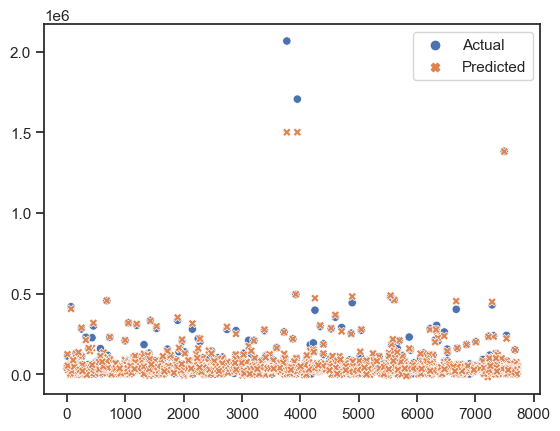

In [1612]:
sns.scatterplot(data=actual_vs_predicted)

### Another Way

In [1553]:

# Extract categorical columns
categorical_columns = ['make', 'model', 'engine fuel type', 'transmission type', 'driven_wheels', 'vehicle size', 'vehicle style']

# Encode categorical columns using one-hot encoding
encoded_categorical = pd.get_dummies(df[categorical_columns])

# Concatenate encoded categorical columns with numerical columns
combined_df = pd.concat([encoded_categorical, df.drop(categorical_columns, axis=1)], axis=1)


In [1555]:
combined_df.shape

(7735, 804)

In [1561]:
X = combined_df.drop('msrp', axis=1)
y = combined_df['msrp']


In [1562]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [1563]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6188, 803), (1547, 803), (6188,), (1547,))

In [1564]:
X_train

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,vehicle style_Regular Cab Pickup,vehicle style_Sedan,vehicle style_Wagon,year,engine hp,engine cylinders,number of doors,highway mpg,city mpg,popularity
4560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,2005,210.0,4.0,4.0,21,16,640
1226,False,False,False,False,False,False,False,False,False,False,...,False,False,False,2017,184.0,4.0,4.0,35,26,586
3617,False,False,False,False,False,False,False,False,False,True,...,False,False,False,2017,285.0,6.0,4.0,24,18,1385
3409,False,False,False,False,False,False,False,False,False,False,...,False,False,False,2015,201.0,4.0,3.0,31,24,1439
1512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,2007,295.0,8.0,4.0,17,13,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,True,False,False,False,False,False,False,False,False,False,...,False,True,False,2000,170.0,4.0,4.0,28,22,204
5390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,2015,155.0,4.0,4.0,31,25,586
860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,2015,332.0,6.0,2.0,26,18,2009
7603,False,False,False,False,False,False,False,False,False,True,...,False,False,False,2016,182.0,4.0,4.0,29,20,1385


In [1565]:
# Instantiate the model 
mlin = LinearRegression()

In [1568]:
# Train the model 
mlin.fit(X_train,y_train)

LinearRegression()

In [1569]:
mlin.score(X_train,y_train), mlin.score(X_test,y_test)   # R2 Score!!

(0.9891412776329019, 0.9648247481510689)

In [1570]:
predicted = mlin.predict(X_test)

In [1571]:
# Create a DataFrame 

actual_vs_predicted = pd.DataFrame(
    {'Actual': y_test, 
     'Predicted':predicted}
)

In [1572]:
actual_vs_predicted.head().round(2)

,Actual,Predicted
1720,39150,42698.22
748,29670,38543.05
3914,30130,31715.97
3656,15660,15263.48
6124,4784,-1523.73


<Axes: >

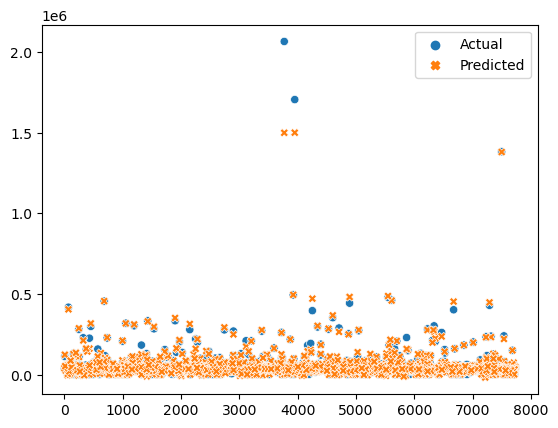

In [1574]:

sns.scatterplot(data=actual_vs_predicted)

# Handling Numerical Variables

 ## Linear regression with scaled numerical features
 ### This challenge aims to investigate the impact of scaling numerical features on our linear regression model. 

In [1684]:
#Apply StandardScaler() to the numerical subset of the train dataset

df=pd.read_csv('cleaned_imputed_data.csv')

In [1685]:
df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'vehicle size', 'vehicle style', 'highway mpg',
       'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [1686]:
df.head()

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
0,Lincoln,MKC,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr SUV,28,21,61,35720
1,Toyota,Avalon Hybrid,2016,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,39,40,2031,41950
2,Dodge,Grand Caravan,2015,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,25,17,1851,27395
3,Lamborghini,Gallardo,2014,premium unleaded (required),570.0,10.0,MANUAL,all wheel drive,2.0,Compact,Coupe,20,13,1158,241200
4,Mercedes-Benz,C43 AMG,1999,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,Compact,Sedan,21,16,617,4661


In [1687]:
# Extract numerical columns
numerical_cols = df[['engine hp','engine cylinders','number of doors','highway mpg','city mpg','popularity','msrp']]

In [1688]:
# Standard scale
from sklearn.preprocessing import StandardScaler
cols = df[['engine hp','engine cylinders','number of doors','highway mpg','city mpg','popularity','msrp']]
scal = StandardScaler()
scal.fit(cols)
s=scal.transform(cols)

In [1689]:
s

array([[-0.3257553 , -0.96306871,  0.64655937, ...,  0.21177389,
        -1.01608968, -0.21400238],
       [-0.67200823, -0.96306871,  0.64655937, ...,  2.83932553,
         0.36239552, -0.12690988],
       [ 0.04646661,  0.0920781 ,  0.64655937, ..., -0.34139488,
         0.23644256, -0.330382  ],
       ...,
       [-1.24332557,  0.0920781 ,  0.64655937, ..., -0.0648105 ,
        -0.62703497, -0.6829039 ],
       [ 1.05925644,  1.14722491, -1.58808617, ..., -1.30944022,
         0.88230136,  1.34628135],
       [-1.53764057, -0.96306871,  0.64655937, ...,  1.31811142,
        -0.64872687, -0.50757259]])

In [1690]:
#convert s to DataFrame
df_s=pd.DataFrame(s,columns=scal.get_feature_names_out())

In [1691]:
df_s

,engine hp,engine cylinders,number of doors,highway mpg,city mpg,popularity,msrp
0,-0.325755,-0.963069,0.646559,0.188865,0.211774,-1.016090,-0.214002
1,-0.672008,-0.963069,0.646559,1.601944,2.839326,0.362396,-0.126910
2,0.046467,0.092078,0.646559,-0.196521,-0.341395,0.236443,-0.330382
3,2.530831,2.202372,-1.588086,-0.838830,-0.894564,-0.248476,2.658512
4,0.210937,1.147225,0.646559,-0.710368,-0.479687,-0.627035,-0.648193
...,...,...,...,...,...,...,...
7730,-1.243326,-0.963069,0.646559,2.758100,4.360540,0.362396,-0.336114
7731,-1.182731,-0.963069,0.646559,0.959635,0.764943,0.482051,-0.444735
7732,-1.243326,0.092078,0.646559,-0.453444,-0.064810,-0.627035,-0.682904
7733,1.059256,1.147225,-1.588086,-1.481139,-1.309440,0.882301,1.346281


In [ ]:
# Create a dataframe with encoded categorical (from the previous challenge) and scaled numerical features for train dataset


In [1692]:
encoded_categorical

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,vehicle style_Convertible,vehicle style_Convertible SUV,vehicle style_Coupe,vehicle style_Crew Cab Pickup,vehicle style_Extended Cab Pickup,vehicle style_Passenger Minivan,vehicle style_Passenger Van,vehicle style_Regular Cab Pickup,vehicle style_Sedan,vehicle style_Wagon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7733,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [1693]:
type(encoded_categorical)

pandas.core.frame.DataFrame

In [1694]:
s_concat=pd.concat([df_s,encoded_categorical], axis=1)

In [1710]:
s_concat 

,engine hp,engine cylinders,number of doors,highway mpg,city mpg,popularity,msrp,make_Acura,make_Alfa Romeo,make_Aston Martin,...,vehicle style_Convertible,vehicle style_Convertible SUV,vehicle style_Coupe,vehicle style_Crew Cab Pickup,vehicle style_Extended Cab Pickup,vehicle style_Passenger Minivan,vehicle style_Passenger Van,vehicle style_Regular Cab Pickup,vehicle style_Sedan,vehicle style_Wagon
0,-0.325755,-0.963069,0.646559,0.188865,0.211774,-1.016090,-0.214002,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.672008,-0.963069,0.646559,1.601944,2.839326,0.362396,-0.126910,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.046467,0.092078,0.646559,-0.196521,-0.341395,0.236443,-0.330382,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2.530831,2.202372,-1.588086,-0.838830,-0.894564,-0.248476,2.658512,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.210937,1.147225,0.646559,-0.710368,-0.479687,-0.627035,-0.648193,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,-1.243326,-0.963069,0.646559,2.758100,4.360540,0.362396,-0.336114,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7731,-1.182731,-0.963069,0.646559,0.959635,0.764943,0.482051,-0.444735,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7732,-1.243326,0.092078,0.646559,-0.453444,-0.064810,-0.627035,-0.682904,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7733,1.059256,1.147225,-1.588086,-1.481139,-1.309440,0.882301,1.346281,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [1720]:
X = s_concat.drop('msrp', axis=1)
y = s_concat['msrp']


In [1735]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [1736]:
# Instantiate the model 
mlin = LinearRegression()

In [1737]:
# Train the model 
mlin.fit(X_train,y_train)

LinearRegression()

In [1738]:
mlin.score(X_train,y_train)   # R2 Score!!

0.9890552121651714

In [1739]:
mlin.score(X_test,y_test)

-1.3316039160663132e+16

In [1740]:
print("Coefficients:", lin_model.coef_)

Coefficients: [-6.80305279e+04 -2.91034016e+04  5.44298130e+04 -2.47204670e+04
 -4.05119782e+03  1.46690797e+05  6.39765655e+05 -7.00201898e+04
 -4.92350298e+04 -6.01825148e+04 -5.92961221e+04 -5.33791510e+04
 -5.19091944e+04  1.49307614e+05  1.87235105e+03 -6.85739038e+04
 -4.35765725e+04 -4.78431928e+04 -4.54198337e+04 -5.90443620e+04
 -7.23090471e+04 -5.22077156e+04  3.07987164e+05 -5.18267204e+04
 -5.74130004e+04 -1.26210718e+05 -2.83282838e+04 -2.87517404e+04
  4.32076507e+05 -6.66385674e+04  5.63861255e+04 -4.05397768e+04
 -7.10394869e+04 -4.88568939e+04 -3.69017547e+04 -7.56426471e+04
 -7.39047760e+04 -9.69902147e+03  1.79051568e+05 -6.50823297e+04
 -6.96878221e+04  3.97902095e+04 -6.68904583e+04 -5.99837624e+04
 -4.74344448e+04 -6.54386082e+04 -5.81845675e+04 -1.70852945e+04
 -1.28289369e+04 -1.38445421e+04 -1.95074778e+04 -2.77891125e+04
 -5.24642914e+03 -2.03373510e+04 -1.16056391e+04 -3.27359463e+03
 -1.86288689e+03 -1.42580030e+03 -1.02810411e+04 -1.18646249e+04
 -1.4265025

In [1741]:
predicted = mlin.predict(X_test)

In [1742]:
# Create a DataFrame 

actual_vs_predicted = pd.DataFrame(
    {'Actual': y_test, 
     'Predicted':predicted}
)

In [1743]:
actual_vs_predicted.head().round(2)

,Actual,Predicted
1720,-0.17,-0.12
748,-0.30,-0.17
3914,-0.29,-0.26
3656,-0.49,-0.51
6124,-0.65,-0.72


<Axes: >

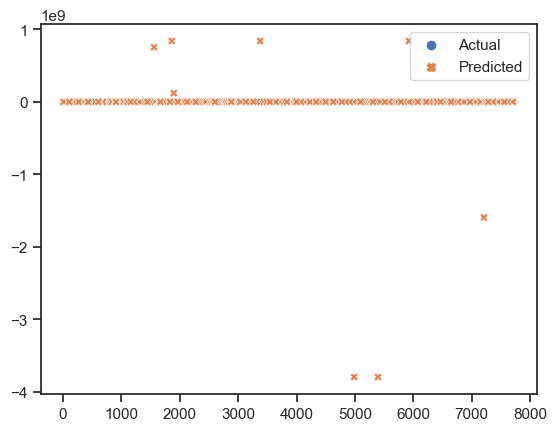

In [1704]:

sns.scatterplot(data=actual_vs_predicted)

# Clustering

### To succeed in the highly competitive automotive industry, it is important to understand customer preferences and target specific market segments. It is crucial for a car business to identify and offer products to distinct groups of customers based on factors.

### In this challenge, we try to cluster cars based on their price and fuel consumption attributes. By analyzing these clusters, we can gain a deeper understanding of the market landscape and identify target customer segments with similar preferences and needs.



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('cleaned_cars_data.csv')

In [4]:
df.head(3)

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
df.shape

(7735, 16)

In [6]:
# Subset the price and fuel consumption related information

subset=df[['msrp','highway mpg']]

In [7]:
subset

,msrp,highway mpg
0,46135,26
1,40650,28
2,36350,28
3,29450,28
4,34500,28
...,...,...
7730,46120,23
7731,56670,23
7732,50620,23
7733,50920,23


In [7]:
# Check the distribution of data and standardize it if necessary

subset.describe()

,msrp,highway mpg
count,7.735000e+03,7735.00000
mean,5.102826e+04,26.52980
std,7.153777e+04,7.78492
min,2.000000e+03,12.00000
25%,2.622500e+04,22.00000
50%,3.560000e+04,26.00000
75%,4.947750e+04,30.00000
max,2.065902e+06,354.00000


In [8]:
subset['msrp'].unique()

array([46135, 40650, 36350, ..., 46120, 50620, 50920])

In [12]:
subset['msrp'].max()

2065902

In [13]:
subset['msrp'].min()

2000

In [14]:
subset['msrp'].std()

71537.7682169822

In [15]:
subset['msrp'].mean()

51028.26296056884

array([[<Axes: title={'center': 'msrp'}>,
        <Axes: title={'center': 'highway mpg'}>]], dtype=object)

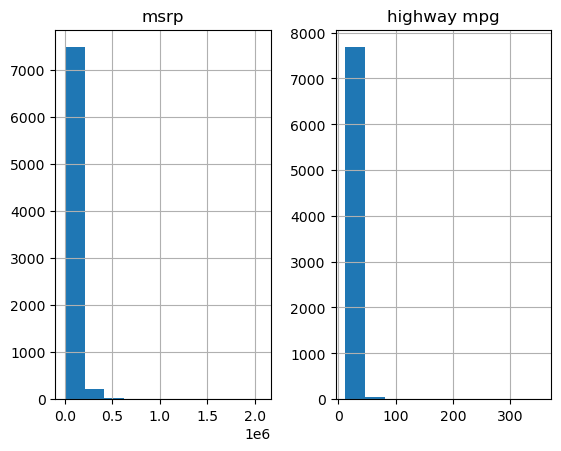

In [26]:
# See the difference

subset.hist()

In [ ]:
# standardize it if necessary

In [15]:
# initiate the standardisation scaler

scaler = StandardScaler()

In [16]:
# fit the scaler

scaler.fit(subset)

StandardScaler()

In [17]:
# transform the dataframe

subset_scaled = scaler.transform(subset)
subset_scaled

array([[-0.06840553, -0.068059  ],
       [-0.14508328,  0.18886456],
       [-0.20519527,  0.18886456],
       ...,
       [-0.00570733, -0.45344434],
       [-0.00151347, -0.45344434],
       [-0.30801474, -0.068059  ]])

In [58]:
# convert to DataFrame
df_subset = pd.DataFrame(subset_scaled,columns=subset.columns)
df_subset

,msrp,highway mpg
0,-0.068406,-0.068059
1,-0.145083,0.188865
2,-0.205195,0.188865
3,-0.301654,0.188865
4,-0.231057,0.188865
...,...,...
7730,-0.068615,-0.453444
7731,0.078869,-0.453444
7732,-0.005707,-0.453444
7733,-0.001513,-0.453444


In [59]:
df_subset.describe()

,msrp,highway mpg
count,7.735000e+03,7.735000e+03
mean,1.837215e-17,-2.020936e-16
std,1.000065e+00,1.000065e+00
min,-6.853923e-01,-1.866524e+00
25%,-3.467381e-01,-5.819061e-01
50%,-2.156799e-01,-6.805900e-02
75%,-2.167894e-02,4.457881e-01
max,2.816700e+01,4.206740e+01


array([[<Axes: title={'center': 'msrp'}>,
        <Axes: title={'center': 'highway mpg'}>]], dtype=object)

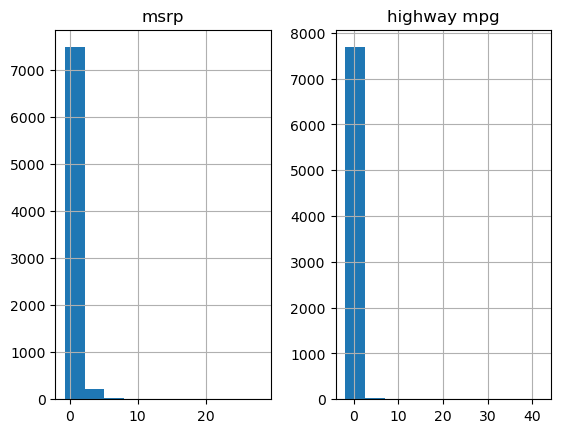

In [63]:
# Check the distribution

df_subset.hist()

In [ ]:
# Use the elbow method to determine the number of clusters

In [60]:
# creating the instance of KMeans (clustering model)

kmeans = KMeans(n_clusters=2, random_state=42)

In [61]:
# fitting the model

kmeans.fit(df_subset)

KMeans(n_clusters=2, random_state=42)

In [62]:
# Checking the inertia
kmeans.inertia_

11935.760977954593

In [ ]:
#Let's check which labels we get from KMeans prediction

In [63]:
# assign a cluster to each example

clusters = kmeans.predict(df_subset)
clusters

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [64]:
#How many in which cluster?

pd.Series(clusters).value_counts().sort_index()

0    4505
1    3230
Name: count, dtype: int64

In [72]:

labels = np.unique(clusters)

labels

array([0, 1, 2], dtype=int32)

In [ ]:
# Now let's add the defined clusters to the dataframe

In [65]:
df_clustered=df_subset.copy()
df_clustered['cluster']=clusters
df_clustered

,msrp,highway mpg,cluster
0,-0.068406,-0.068059,0
1,-0.145083,0.188865,1
2,-0.205195,0.188865,1
3,-0.301654,0.188865,1
4,-0.231057,0.188865,1
...,...,...,...
7730,-0.068615,-0.453444,0
7731,0.078869,-0.453444,0
7732,-0.005707,-0.453444,0
7733,-0.001513,-0.453444,0


In [74]:
labels = np.unique(df_subset)

labels

array([-1.86652392, -1.73806214, -1.60960036, ..., 23.13250403,
       28.16699547, 42.06740478])

In [57]:
 # Add 'Engine Fuel type' to the dataframe again

In [66]:
df_clustered['model']=df['model']
df_clustered

,msrp,highway mpg,cluster,model
0,-0.068406,-0.068059,0,1 Series M
1,-0.145083,0.188865,1,1 Series
2,-0.205195,0.188865,1,1 Series
3,-0.301654,0.188865,1,1 Series
4,-0.231057,0.188865,1,1 Series
...,...,...,...,...
7730,-0.068615,-0.453444,0,ZDX
7731,0.078869,-0.453444,0,ZDX
7732,-0.005707,-0.453444,0,ZDX
7733,-0.001513,-0.453444,0,ZDX


In [ ]:
#Let's check the mapping between the make and clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

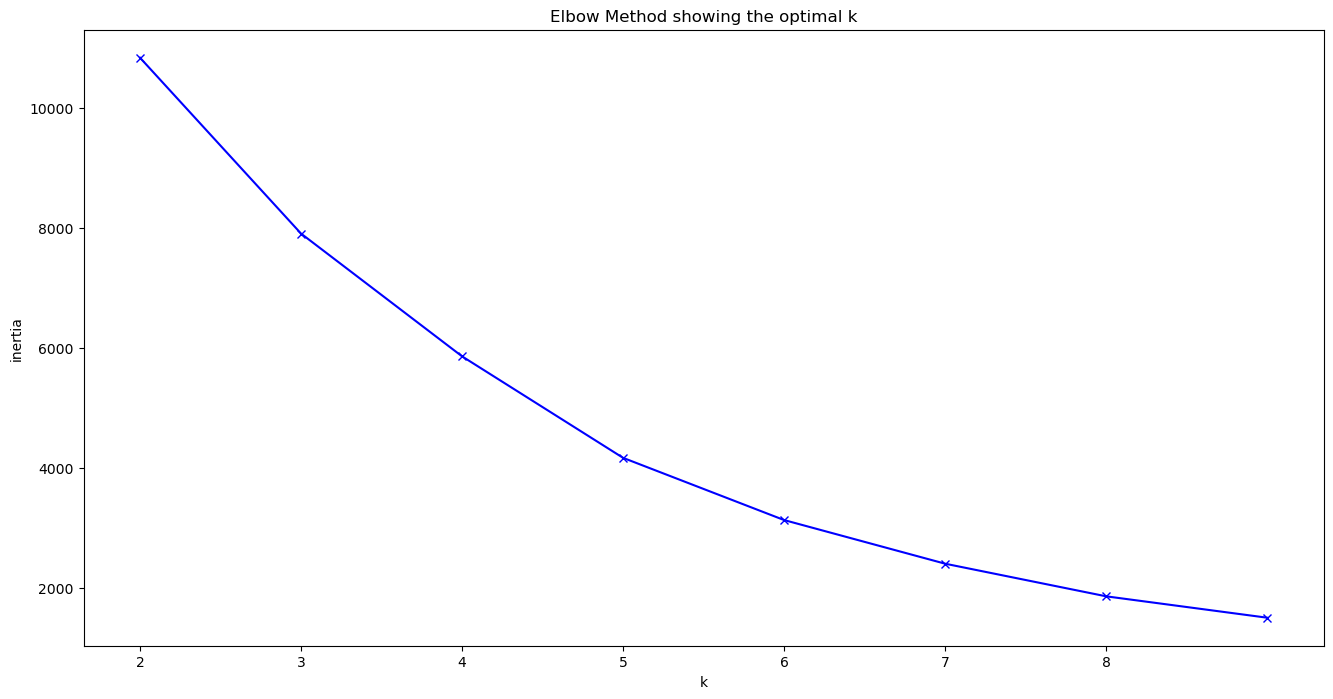

In [83]:
K = range(2, 10) #let's give it a range
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, # a different random state 
                    n_init=10)
    kmeans.fit(df_subset)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # shows the x symbols on the graph
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

In [32]:
# Repeat k-means clustering with k = 3

In [88]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_subset)

clusters = kmeans.predict(df_subset)
df_clustered_3 = df_subset.copy() 
df_clustered_3["cluster"] = clusters
df_clustered_3




,msrp,highway mpg,cluster
0,-0.068406,-0.068059,1
1,-0.145083,0.188865,1
2,-0.205195,0.188865,1
3,-0.301654,0.188865,1
4,-0.231057,0.188865,1
...,...,...,...
7730,-0.068615,-0.453444,1
7731,0.078869,-0.453444,1
7732,-0.005707,-0.453444,1
7733,-0.001513,-0.453444,1


In [71]:
df_subset.shape

(7735, 2)

In [45]:
df_clustered_3['cluster']

0       1
1       1
2       1
3       1
4       1
       ..
7730    1
7731    1
7732    1
7733    1
7734    1
Name: cluster, Length: 7735, dtype: int32

array([[<Axes: title={'center': 'msrp'}>,
        <Axes: title={'center': 'highway mpg'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

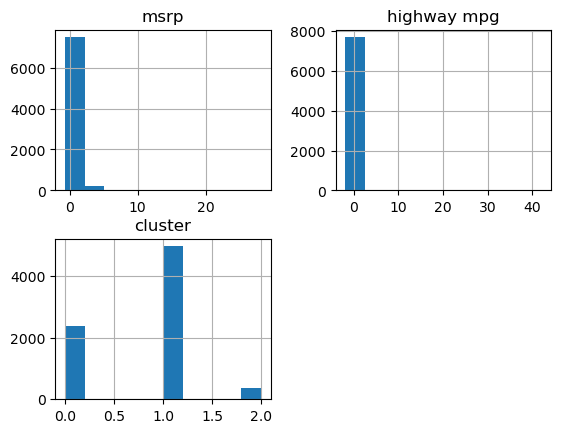

In [39]:
df_clustered_3.hist()

In [80]:
# Repeat k-means clustering with k = 4

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_subset)

clusters = kmeans.predict(df_subset)
df_clustered_4 = df_subset.copy() 
df_clustered_4["cluster"] = clusters
df_clustered_4

,msrp,highway mpg,cluster
0,-0.068406,-0.068059,0
1,-0.145083,0.188865,0
2,-0.205195,0.188865,0
3,-0.301654,0.188865,0
4,-0.231057,0.188865,0
...,...,...,...
7730,-0.068615,-0.453444,0
7731,0.078869,-0.453444,0
7732,-0.005707,-0.453444,0
7733,-0.001513,-0.453444,0


array([[<Axes: title={'center': 'msrp'}>,
        <Axes: title={'center': 'highway mpg'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

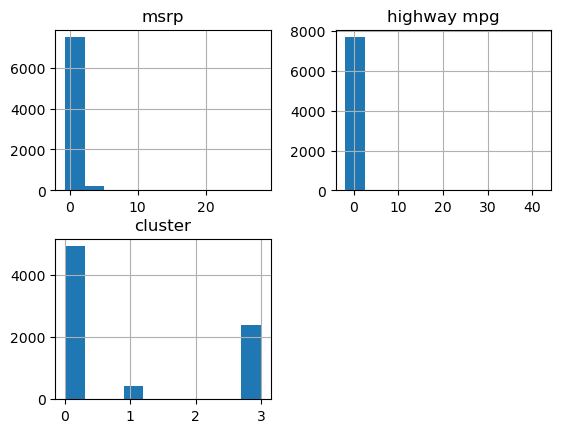

In [82]:
df_clustered_4.hist()

In [83]:
# Repeat k-means clustering with k = 5

In [81]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(df_subset)

clusters = kmeans.predict(df_subset)
df_clustered_5 = df_subset.copy() 
df_clustered_5["cluster"] = clusters
df_clustered_5["cluster"]

0       2
1       2
2       2
3       2
4       2
       ..
7730    2
7731    2
7732    2
7733    2
7734    2
Name: cluster, Length: 7735, dtype: int32

array([[<Axes: title={'center': 'msrp'}>,
        <Axes: title={'center': 'highway mpg'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

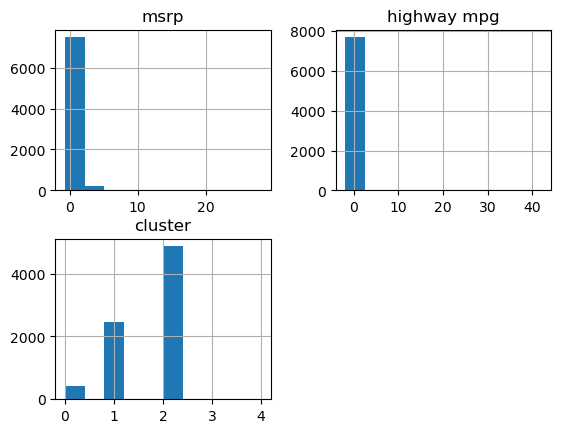

In [86]:
df_clustered_5.hist()

In [79]:
# check if clusters match

df_clustered_3.groupby(['msrp','cluster']).count().head(3)

highway mpg
msrp      cluster             
-0.685392 0                 87
          1                220
-0.685001 1                  1

In [78]:
df_clustered_3.groupby(['highway mpg','cluster']).count().head(10)

msrp
highway mpg cluster      
-1.866524   2           4
-1.738062   2           5
-1.609600   1          14
            2          17
-1.481139   1          33
            2          46
-1.352677   1          88
            2          52
-1.224215   1         179
            2          28

In [ ]:
# Repeat k-means clustering with k = 6

In [121]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(df_subset)

clusters = kmeans.predict(df_subset)
df_clustered_6 = df_subset.copy() 
df_clustered_6["cluster"] = clusters
df_clustered_6["cluster"]

0       3
1       0
2       0
3       0
4       0
       ..
7730    3
7731    3
7732    3
7733    3
7734    3
Name: cluster, Length: 7735, dtype: int32

In [122]:
df_clustered_6

,msrp,highway mpg,cluster
0,-0.068406,-0.068059,3
1,-0.145083,0.188865,0
2,-0.205195,0.188865,0
3,-0.301654,0.188865,0
4,-0.231057,0.188865,0
...,...,...,...
7730,-0.068615,-0.453444,3
7731,0.078869,-0.453444,3
7732,-0.005707,-0.453444,3
7733,-0.001513,-0.453444,3


array([[<Axes: title={'center': 'msrp'}>,
        <Axes: title={'center': 'highway mpg'}>],
       [<Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

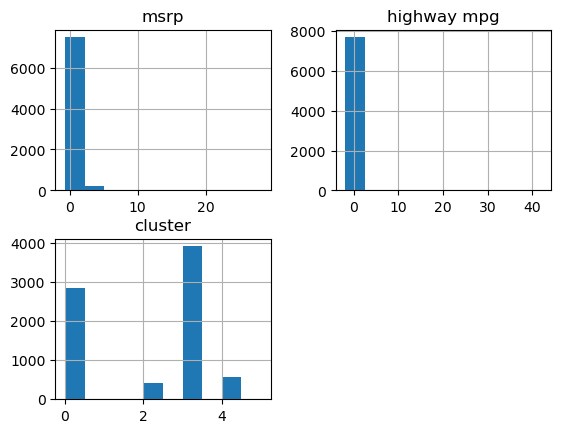

In [123]:
df_clustered_6.hist()

In [124]:
# check if clusters match

df_clustered_6.groupby(['msrp','cluster']).count().head(3)

highway mpg
msrp      cluster             
-0.685392 0                126
          3                164
          4                 17

In [125]:
df_clustered_6.groupby(['highway mpg','cluster']).count().head(10)

msrp
highway mpg cluster      
-1.866524   2           4
-1.738062   2           5
-1.609600   1           4
            2          14
            3          13
-1.481139   2          50
            3          29
-1.352677   1           2
            2          50
            3          88

In [ ]:
# Conclusion: k-means clustering with k = 6 performs well. Cluster also to be 6. 